In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("adult_income.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
data=data.rename(columns={"education.num":"education_num",'marital.status':"marital_status","capital.gain":"capital_gain","capital.loss":"capital_loss","hours.per.week":"hours_per_week","native.country":"native_country"})

In [7]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
data.duplicated().sum()

24

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
#seperating out numerical features and categorical features

In [15]:
cat_features=data.select_dtypes(include="object").columns

In [16]:
num_features=data.select_dtypes(exclude='object').columns

In [17]:
cat_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [18]:
num_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [19]:
# let check unique values in categorical columns

for i in cat_features:
    print(i,"::", data[i].unique())
    print("="*100)

workclass :: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education :: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital_status :: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation :: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship :: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race :: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex :: ['Female' 'Male']
native_country :: ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippi

In [20]:
#workglass/occupation/native_country

In [21]:
# from sklearn.impute import SimpleImputer

In [22]:
data['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [23]:
for i in ['workclass','occupation','native_country']:
    print(i,data[i].mode())
    print()

workclass 0    Private
Name: workclass, dtype: object

occupation 0    Prof-specialty
Name: occupation, dtype: object

native_country 0    United-States
Name: native_country, dtype: object



In [24]:
data['workclass'] = data["workclass"].replace("?", "Private")
data['occupation'] = data["workclass"].replace("?", "Prof-specialty")
data['native_country'] = data["workclass"].replace("?", "United-States")

In [25]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,40,Private,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,18,Private,<=50K
2,66,Private,186061,Some-college,10,Widowed,Private,Unmarried,Black,Female,0,4356,40,Private,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Private,Unmarried,White,Female,0,3900,40,Private,<=50K
4,41,Private,264663,Some-college,10,Separated,Private,Own-child,White,Female,0,3900,40,Private,<=50K


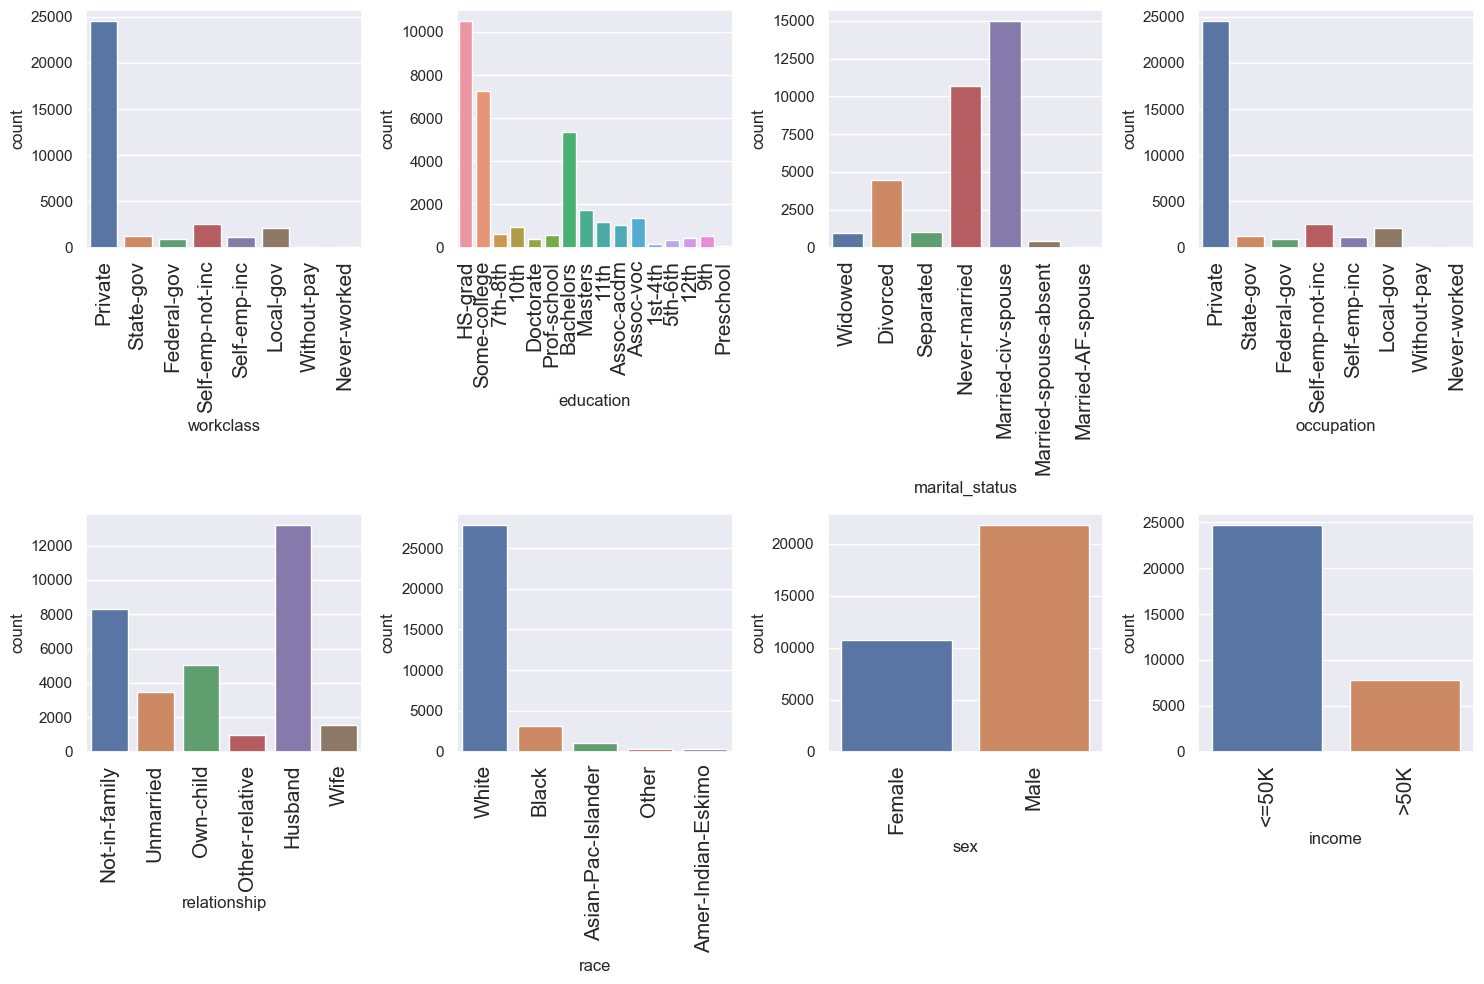

In [26]:
plt.style.use ('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,10)})

columns1=['workclass','education','marital_status','occupation','relationship', 'race', 'sex', 'income']

for i in range(0, len(columns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

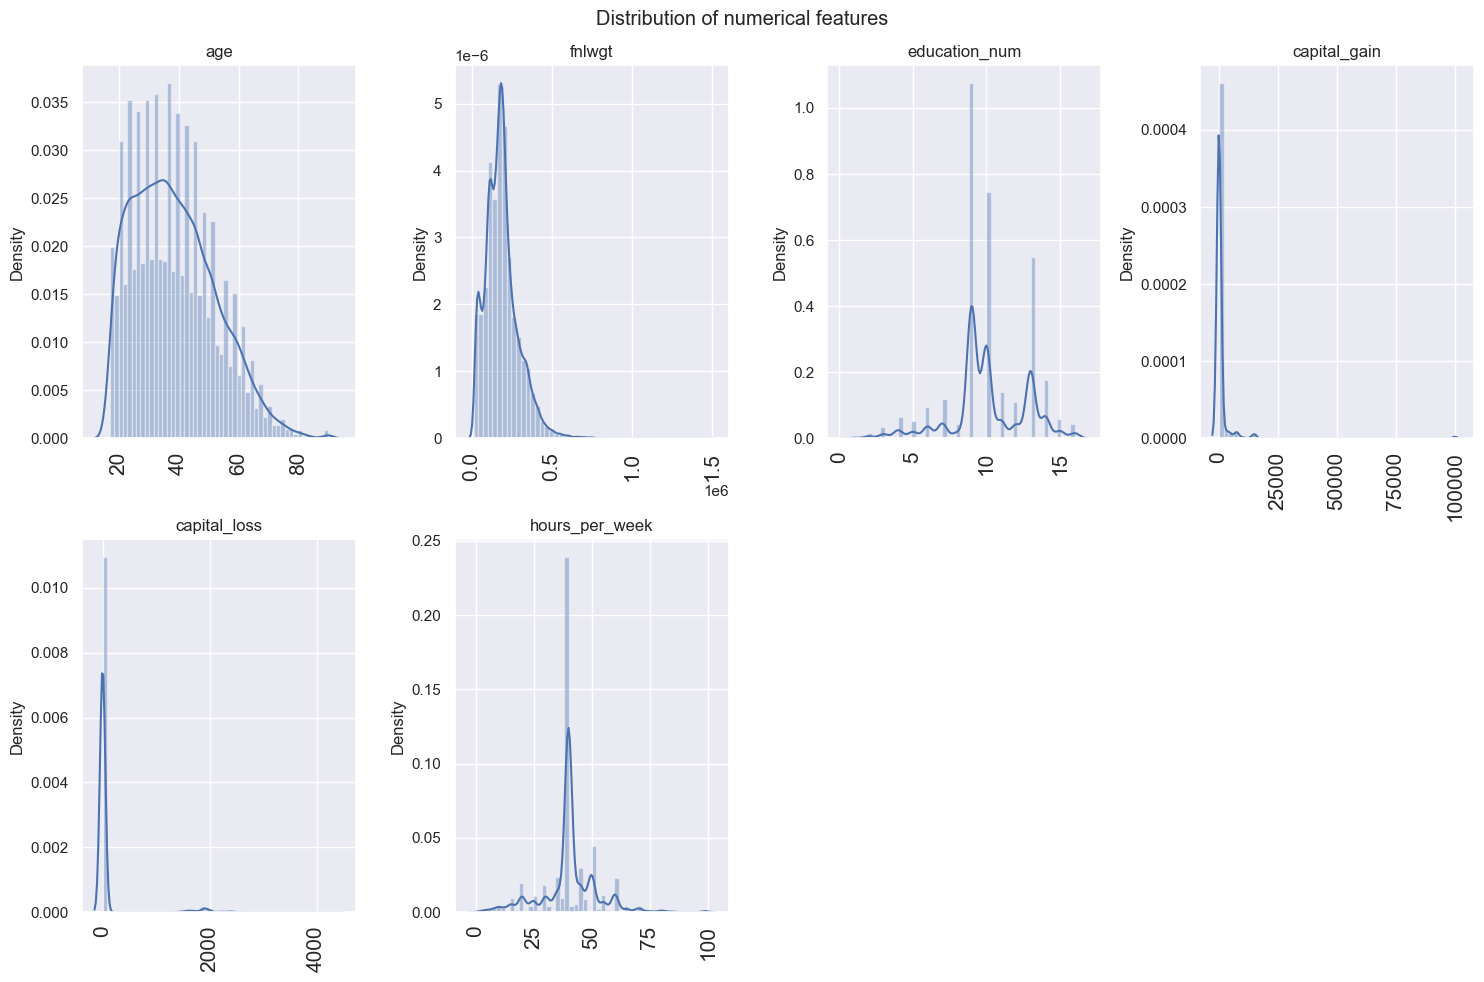

In [27]:
plt.suptitle("Distribution of numerical features")

for i in range (0,len(num_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[num_features[i]])
    plt.title(num_features[i])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

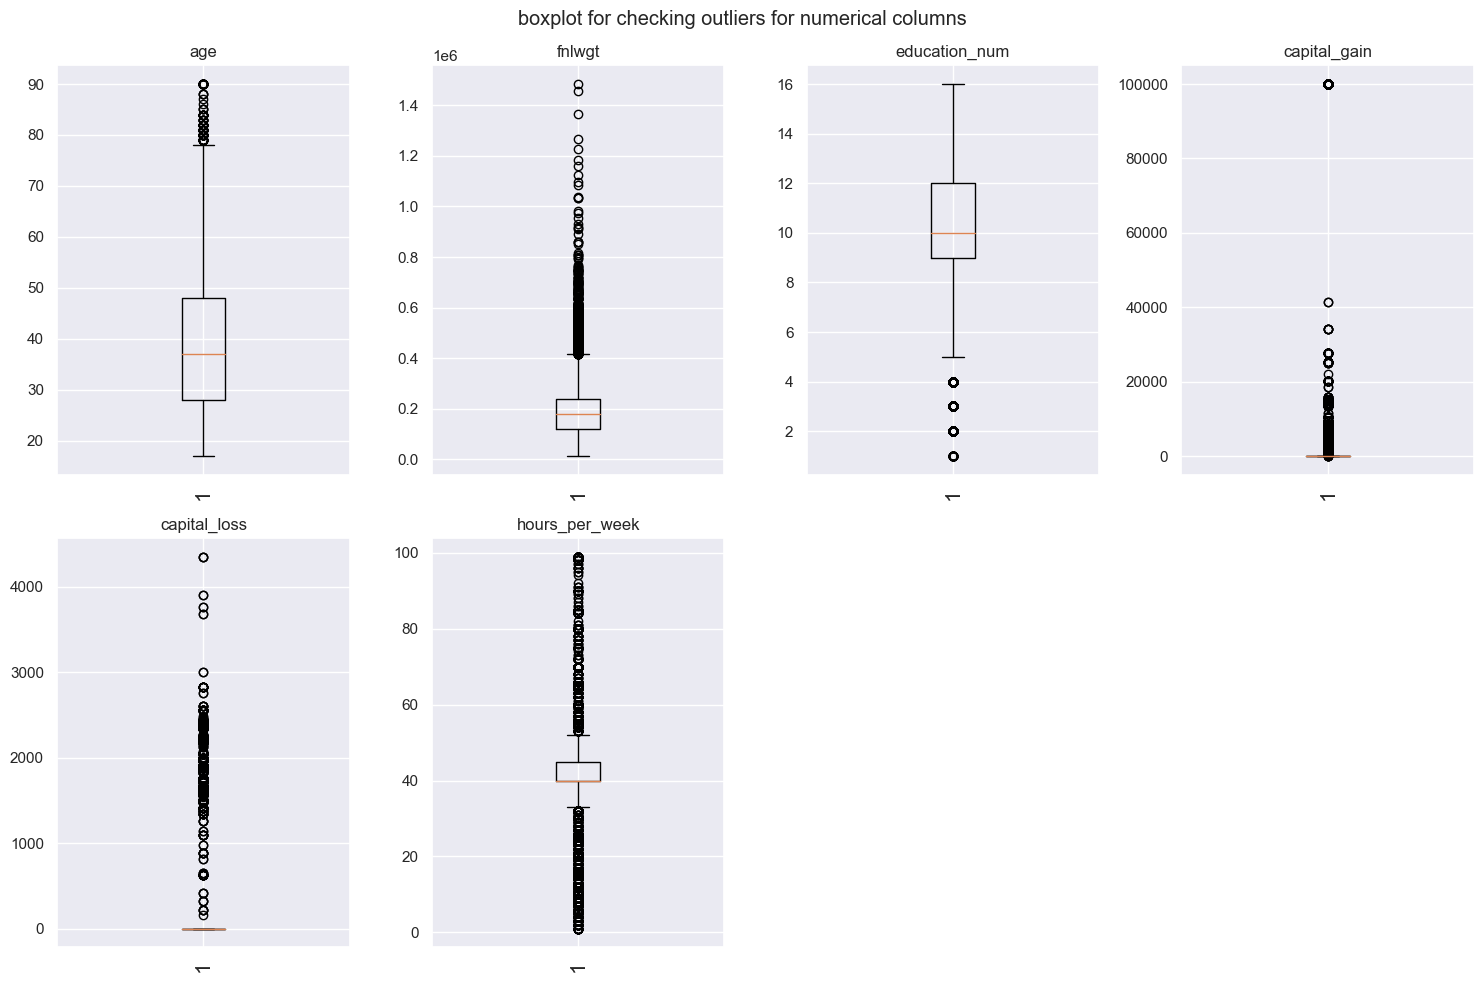

In [28]:
plt.suptitle('boxplot for checking outliers for numerical columns')

for i in range(0,len(num_features)):
    plt.subplot(2,4,i+1)
    plt.boxplot(x=data[num_features[i]])
    plt.title(num_features[i])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

<Axes: xlabel='income'>

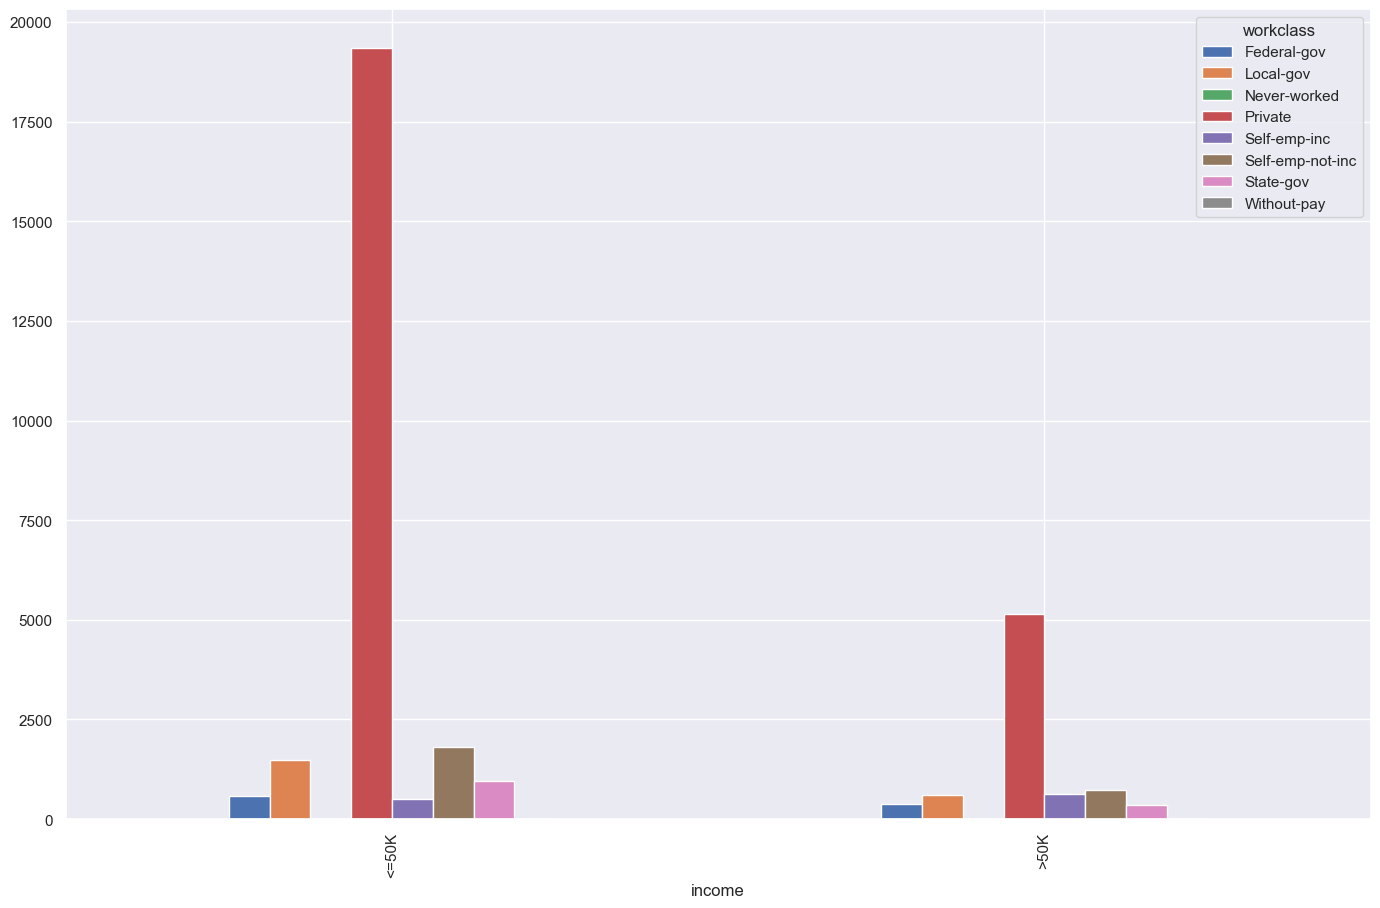

In [29]:
salary=pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

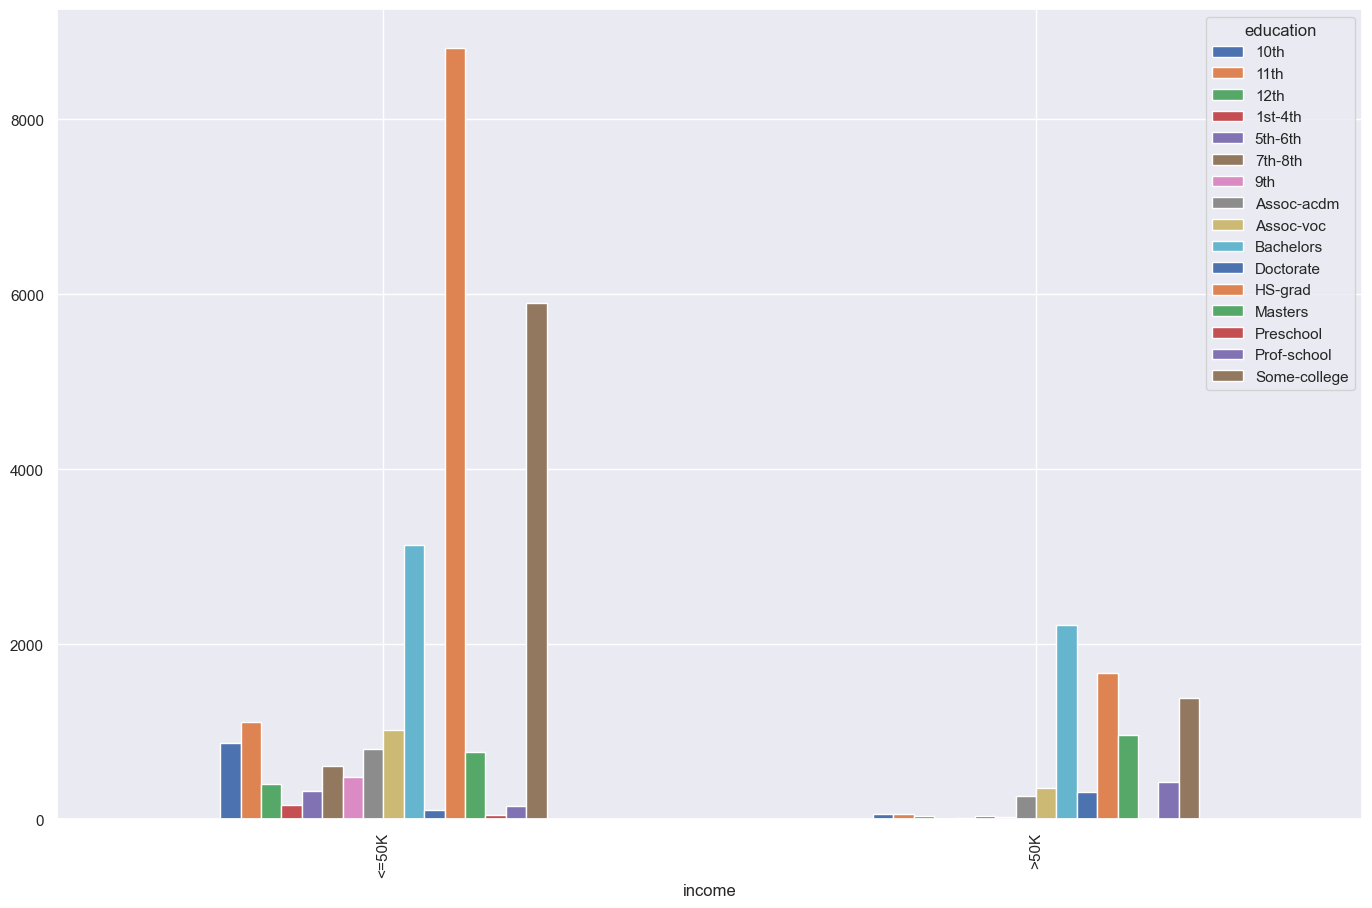

In [30]:
education=pd.crosstab(data['income'],data['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

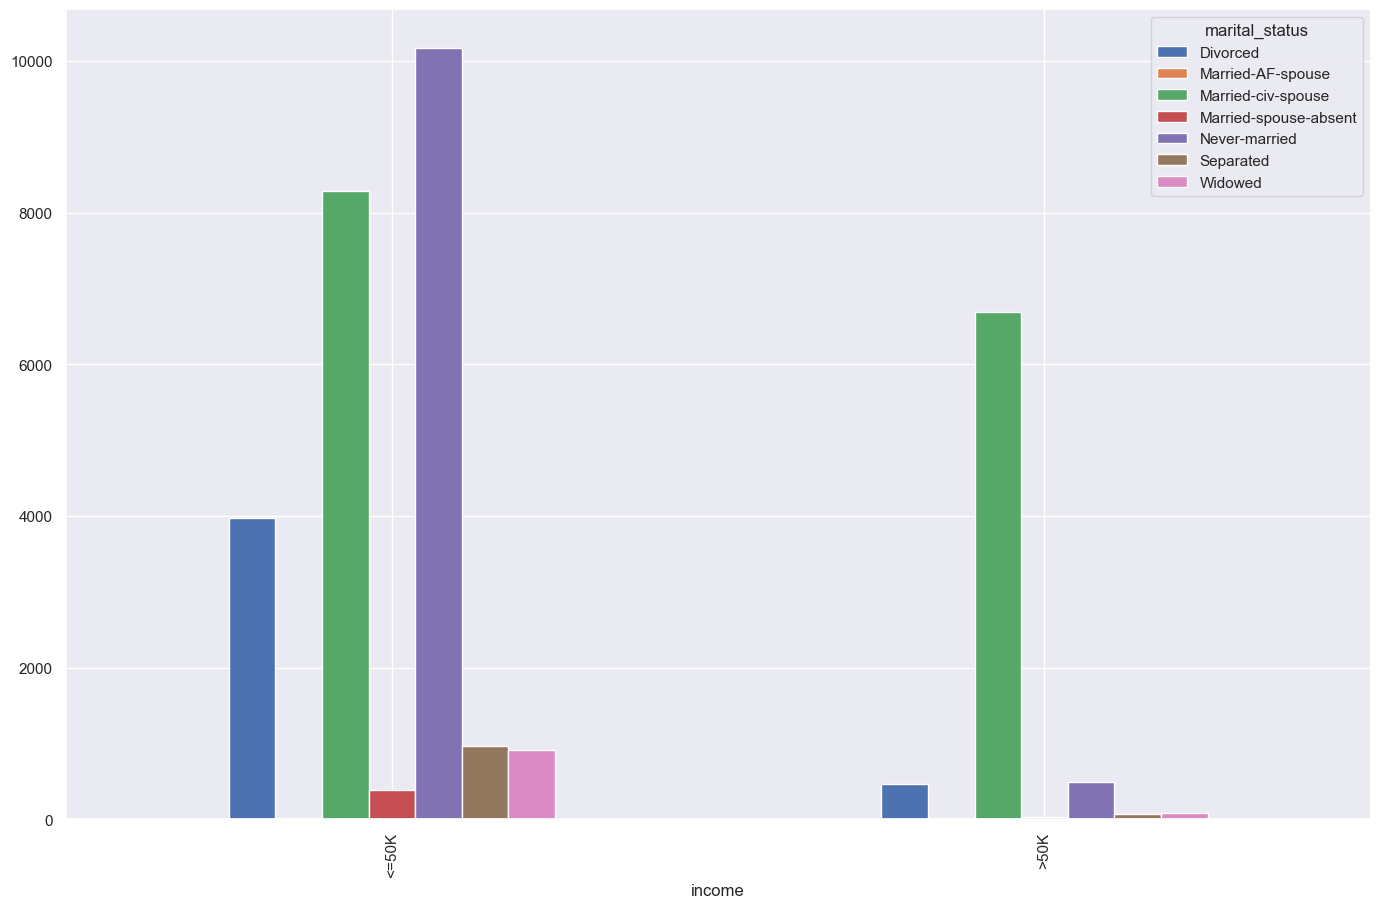

In [31]:
marital_status=pd.crosstab(data['income'],data['marital_status'])
marital_status.plot(kind='bar')

In [32]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<Axes: xlabel='income'>

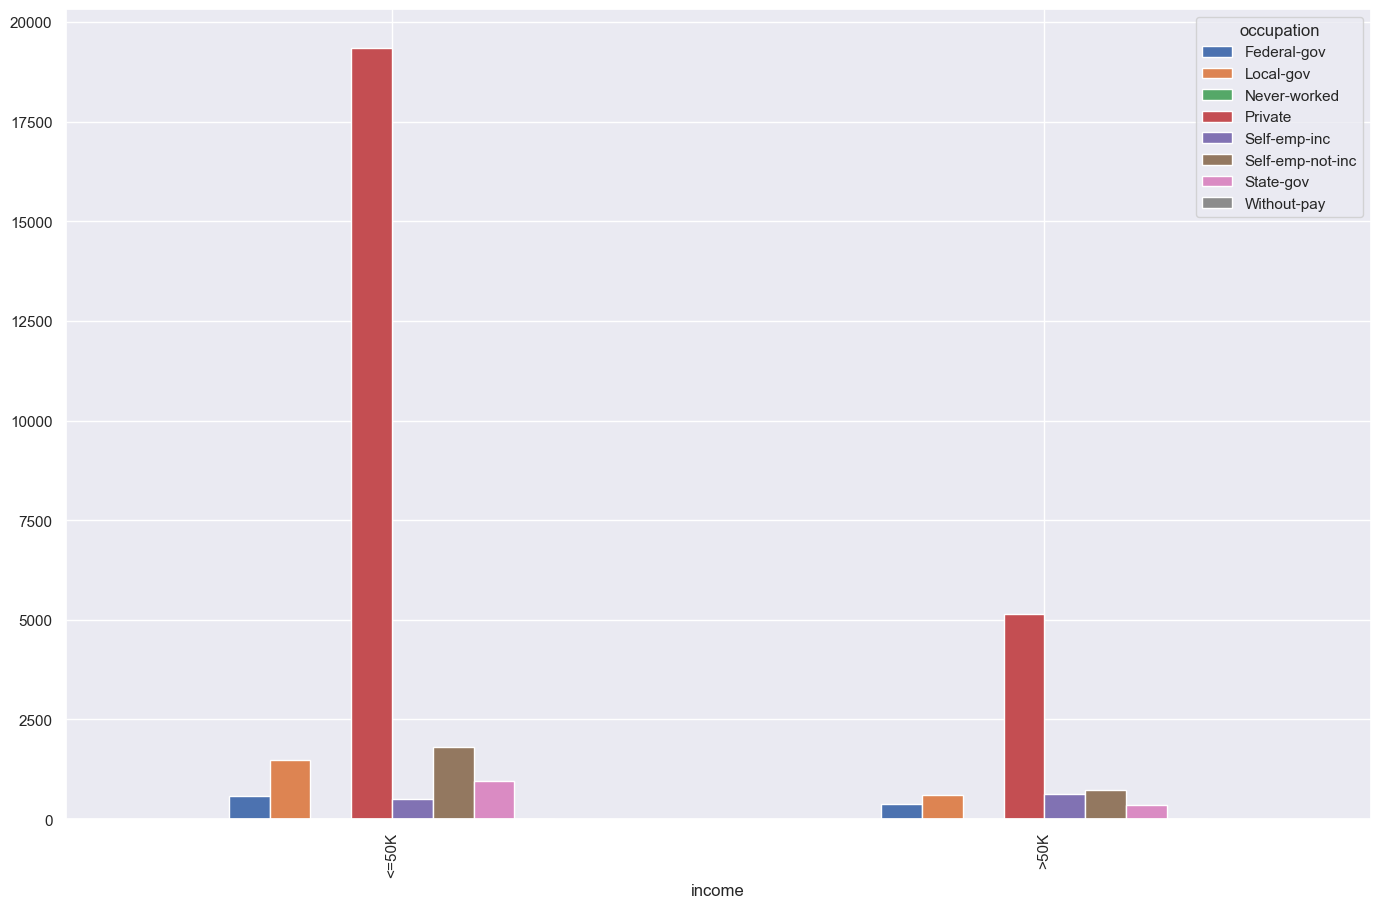

In [33]:
occupation=pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind='bar')

<Axes: xlabel='income'>

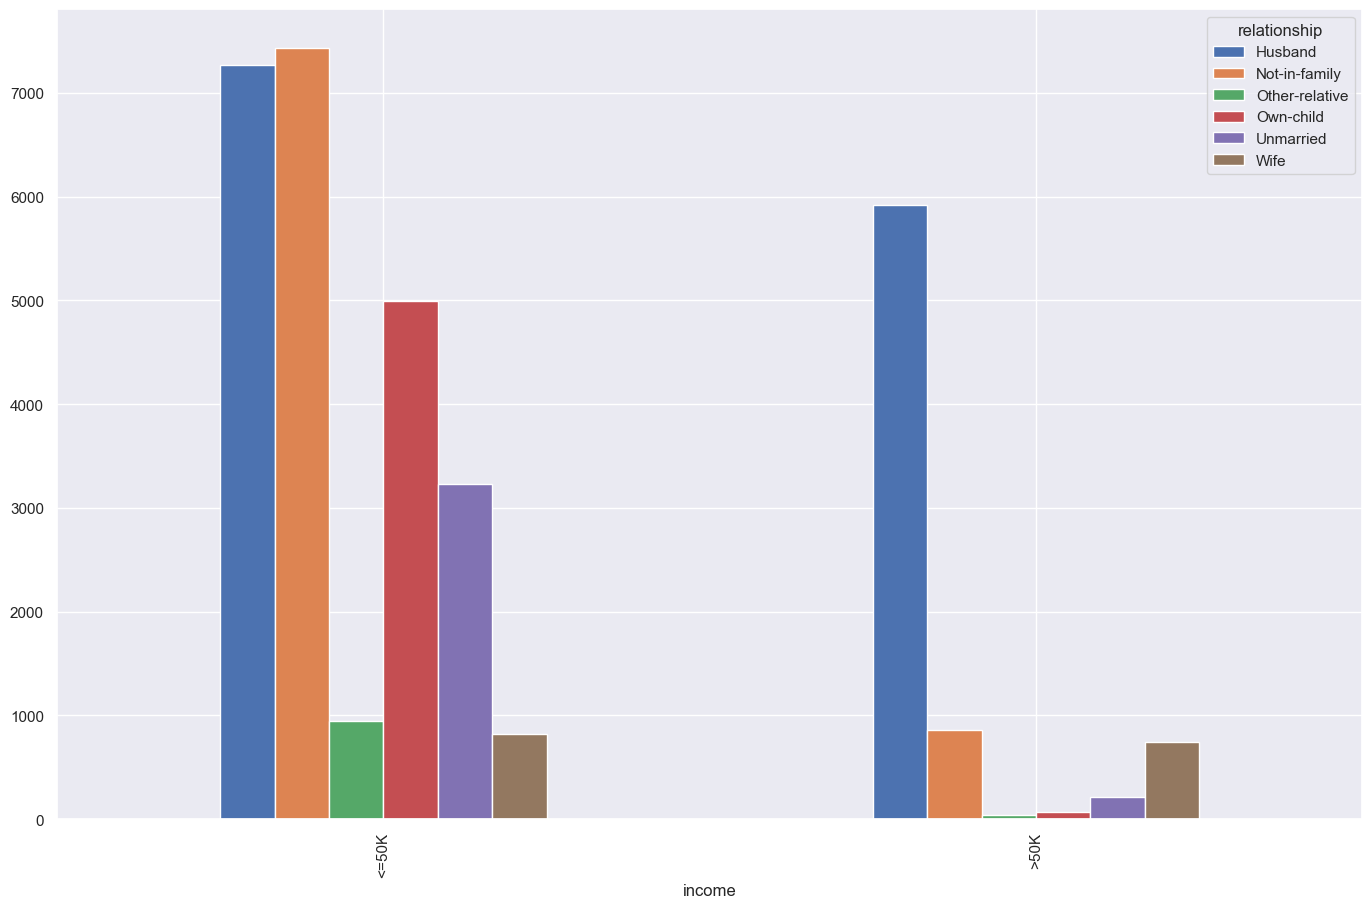

In [34]:
relationship=pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind='bar')

<Axes: xlabel='income'>

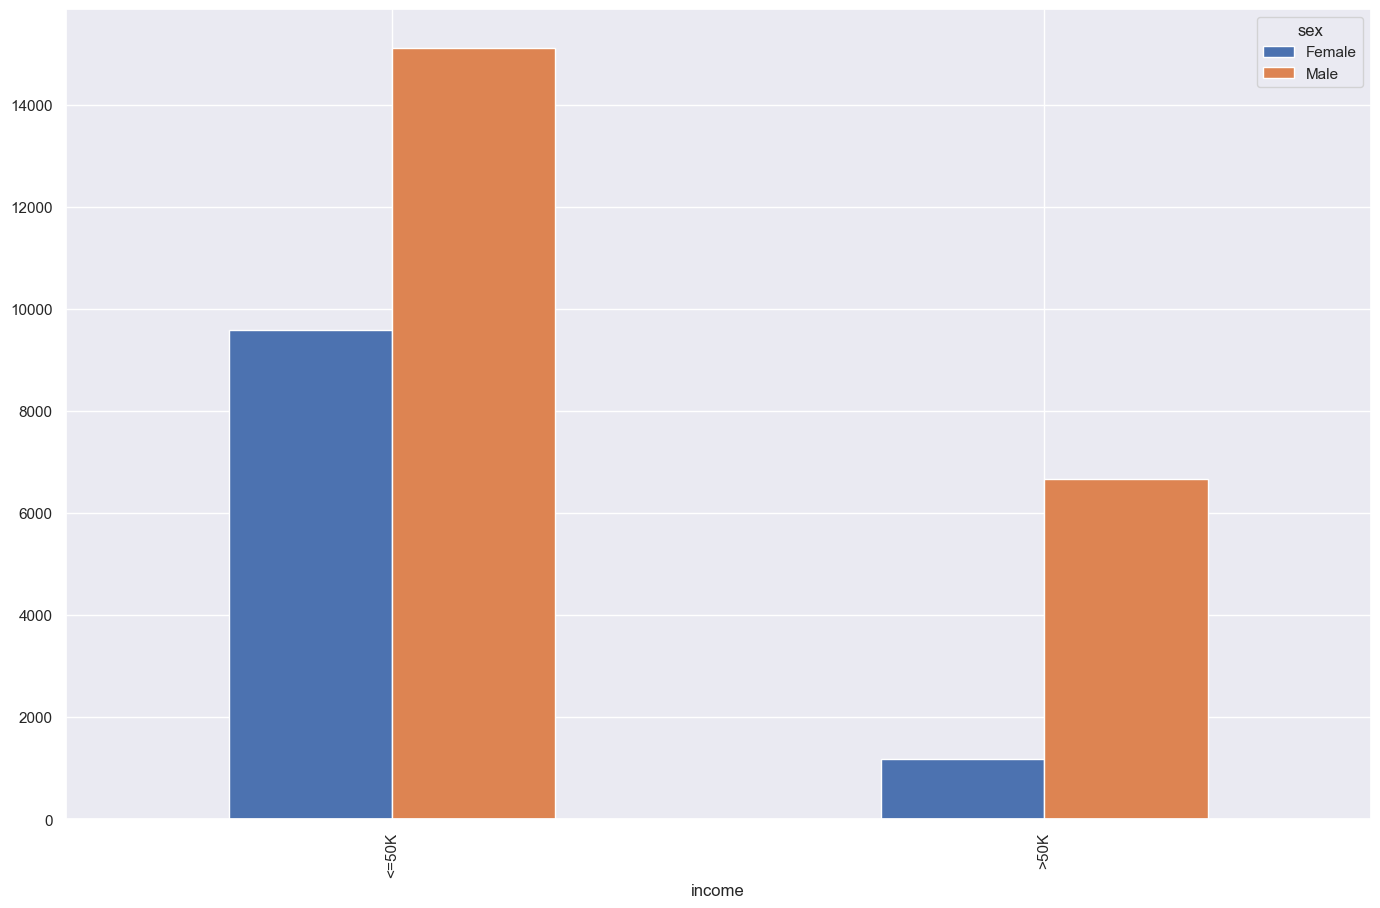

In [35]:
sex_status=pd.crosstab(data['income'],data['sex'])
sex_status.plot(kind='bar')

In [36]:
cat_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [37]:
cat_col_list=cat_features.to_list()

In [38]:
# will tranform all categorical column to numerial column

In [39]:
from sklearn.preprocessing import LabelEncoder

#create label encoder object

encoder=LabelEncoder()

list1=['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native_country']

#loop through all categorical features and encode them

for feature in list1:
    encoder.fit(data[feature])
    data[feature]=encoder.transform(data[feature])

In [40]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,3,77053,11,9,6,3,1,4,0,0,4356,40,3,<=50K
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,3,<=50K
2,66,3,186061,15,10,6,3,4,2,0,0,4356,40,3,<=50K
3,54,3,140359,5,4,0,3,4,4,0,0,3900,40,3,<=50K
4,41,3,264663,15,10,5,3,3,4,0,0,3900,40,3,<=50K


In [42]:
data['income'].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [43]:
data['income']=data['income'].map({'<=50K':0,'>50K':1})

<Axes: >

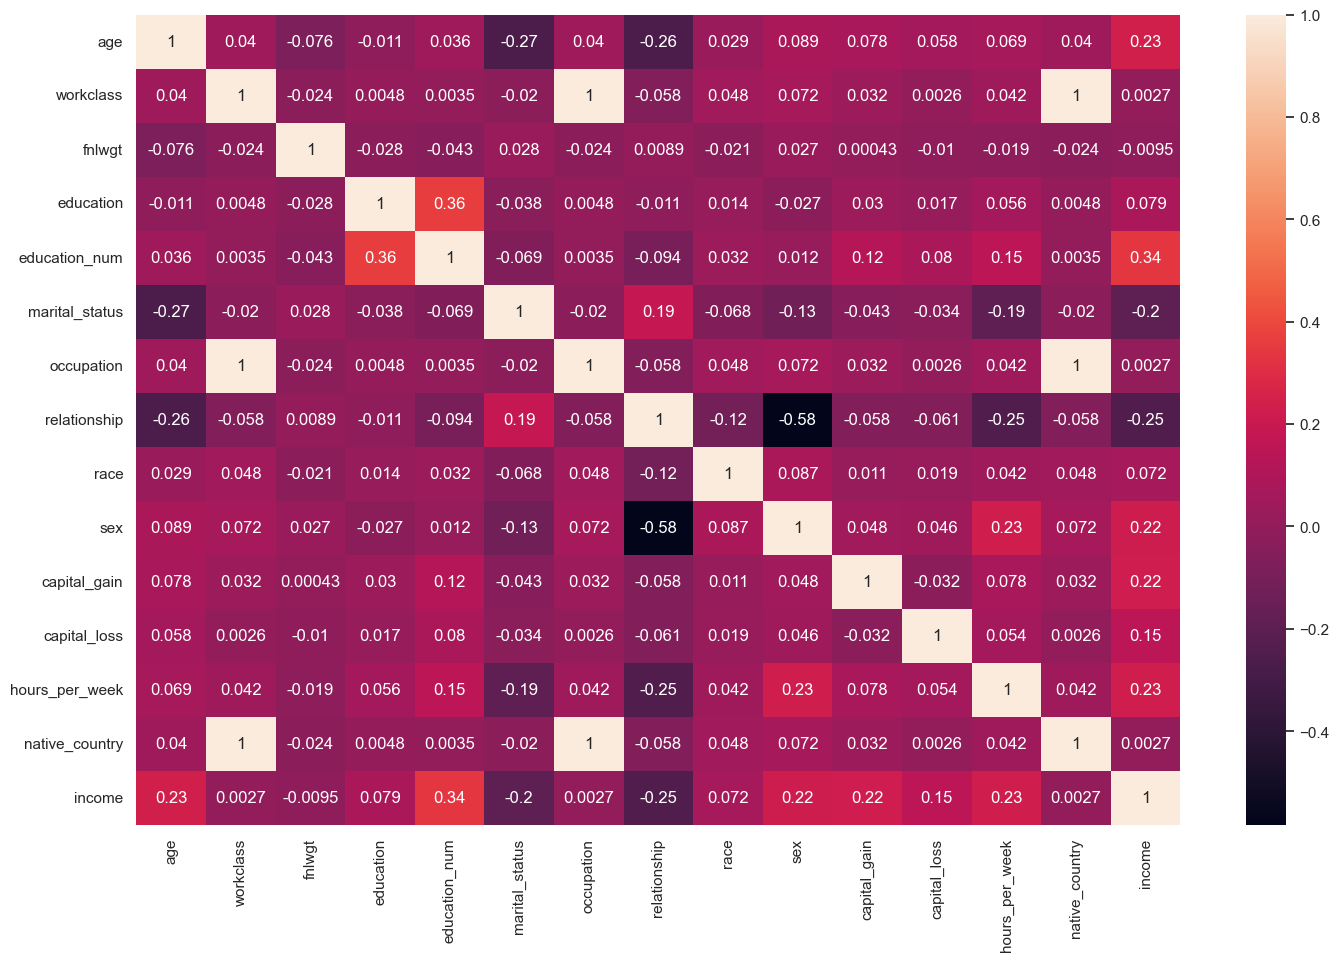

In [44]:
sns.heatmap(data.corr(),annot=True)

In [45]:
#dropping unwanted column
data.drop(['education','fnlwgt','native_country'],axis=1,inplace=True)

In [46]:
data.to_csv('cleandata.csv',index=False)

In [47]:
# Model training

In [48]:
#seperate out dependent features and independent features

In [49]:
X=data.drop('income',axis=1)
y=data['income']

In [50]:
y.isnull().sum()

0

In [51]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

In [52]:
categorical_feats=X.select_dtypes(include='object').columns
numerical_feats=X.select_dtypes(exclude='object').columns

In [53]:
print(categorical_feats)

Index([], dtype='object')


In [54]:
print(numerical_feats)

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [55]:
# there is not single cat column data simple for process ahead

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [57]:
num_pipeline=Pipeline(
    [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

# cat_pipeline(
#     [
#         ('Imputer',SimpleImputer(strategy='most_frequent')),
#         ('scaler',StandarScaler())
#     ]
# )


#apply transform to particular column

preprocessor=ColumnTransformer([
    (
        'num_pipeline',num_pipeline,num_features
    )
])


In [58]:
# Train_test_split

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [61]:
### model building

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report


In [63]:
def performance_metrices(test,predict):
    confusion_metrix=print(f"confusion metrix:{confusion_matrix(test,predict)}")

    precision=print(f"precisoin score:{confusion_matrix(test,predict)}")
    
    recall=print(f"recall score:{recall_score(test,predict)}")
    
    accuracy_score=print(f"accuracy score:{accuracy_score(test,predict)}")

    return confusion_metrix,precision,recall,accuracy_score

In [64]:
#use hyperparameter tuning

lr=LogisticRegression()

In [68]:
param={
    'class_weight':['balanced'],
    'penalty':['l1','l2'],
    'C':[0.001,0.01,0.1,10,100],
    'solver':['liblinear','saga']
}

In [69]:
grid=GridSearchCV(estimator=lr,param_grid=param,cv=5,n_jobs=-1,verbose=3)

In [70]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [71]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [73]:
grid.score(X_train,y_train)

0.7810134849590841

In [74]:
y_pred=grid.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.7748924400737554

In [77]:
dr=DecisionTreeClassifier()

In [83]:
param_grid_dr={
    'class_weight':['balanced'],
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3],
    'max_features':['auto','sqrt','log2']
}

In [84]:
grid_search=GridSearchCV(estimator=dr,param_grid=param_grid_dr,cv=5,scoring='accuracy')

In [85]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [86]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [87]:
grid_search.score(X_train,y_train)

0.7710630450651197

In [88]:
y_pred=grid_search.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred)

0.7645974185617701

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      4926
           1       0.51      0.81      0.63      1582

    accuracy                           0.76      6508
   macro avg       0.72      0.78      0.73      6508
weighted avg       0.82      0.76      0.78      6508



In [91]:
rf=RandomForestClassifier()

In [95]:
param_rf={
    'class_weight':['balanced'],
    'n_estimators':[20,50,30],
    'max_depth':[10,8,5],
    'min_samples_split':[2,5,10]
}

In [96]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_rf,cv=5,scoring='accuracy')

In [97]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [98]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 50}

In [99]:
grid_search.score(X_train,y_train)

0.8251181374620615

In [100]:
y_pred=grid_search.predict(X_test)

In [101]:
accuracy_score(y_test,y_pred)

0.8160725261216963

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4926
           1       0.58      0.86      0.69      1582

    accuracy                           0.82      6508
   macro avg       0.76      0.83      0.78      6508
weighted avg       0.86      0.82      0.83      6508

